In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Datasets/DartsPlayers'):
  for filename in filenames:
    input_path = os.path.join(dirname, filename)
    print(input_path)

/content/drive/MyDrive/Datasets/DartsPlayers/PlayerProfiles.csv
/content/drive/MyDrive/Datasets/DartsPlayers/Top500DartsPlayers.csv


In [3]:
playerprofiles = pd.read_csv("/content/drive/MyDrive/Datasets/DartsPlayers/PlayerProfiles.csv")
topplayers = pd.read_csv("/content/drive/MyDrive/Datasets/DartsPlayers/Top500DartsPlayers.csv")

In [4]:
playerprofiles.head()

,Name :,Country :,Age :,Date Of Birth :,Nickname :,PDC Ranking :,Tour Card :,Career Earnings :
0,Michael van Gerwen,Netherlands,32,4/25/1989,Mighty Mike,1,Yes,"£8,321,167"
1,Peter Wright,Scotland,51,3/10/1970,Snake Bite,2,Yes,"£3,469,888"
2,Gerwyn Price,Wales,36,3/7/1985,The Iceman,3,Yes,"£1,497,803"
3,Adrian Lewis,England,36,1/21/1985,Jackpot,13,Yes,"£3,137,634"
4,James Wade,England,38,4/6/1983,The Machine,9,Yes,"£3,458,893"


In [5]:
playerprofiles.shape

(96, 8)

In [6]:
topplayers.head()

,Rank,Player,Country,Prize
0,1,Michael van Gerwen,Netherlands,"£8,321,167"
1,2,Phil Taylor,England,"£7,630,816"
2,3,Gary Anderson,Scotland,"£4,118,772"
3,4,Raymond van Barneveld,Netherlands,"£3,510,128"
4,5,Peter Wright,Scotland,"£3,470,888"


In [7]:
playerprofiles.drop_duplicates()
playerprofiles.head()

,Name :,Country :,Age :,Date Of Birth :,Nickname :,PDC Ranking :,Tour Card :,Career Earnings :
0,Michael van Gerwen,Netherlands,32,4/25/1989,Mighty Mike,1,Yes,"£8,321,167"
1,Peter Wright,Scotland,51,3/10/1970,Snake Bite,2,Yes,"£3,469,888"
2,Gerwyn Price,Wales,36,3/7/1985,The Iceman,3,Yes,"£1,497,803"
3,Adrian Lewis,England,36,1/21/1985,Jackpot,13,Yes,"£3,137,634"
4,James Wade,England,38,4/6/1983,The Machine,9,Yes,"£3,458,893"


In [8]:
playerprofiles.shape

(96, 8)

In [9]:
import re

col_list = []

for col in playerprofiles.columns:
    pattern= r'^\s+'
    ren = re.sub(":", "", col)
    renamed = re.sub(" ", "", ren)
    col_list.append(renamed)

In [10]:
playerprofiles = playerprofiles.rename(columns={playerprofiles.columns[0] : col_list[0],
                                                playerprofiles.columns[1] : col_list[1],
                                                playerprofiles.columns[2] : col_list[2],
                                                playerprofiles.columns[3] : col_list[3],
                                                playerprofiles.columns[4] : col_list[4],
                                                playerprofiles.columns[5] : col_list[5],
                                                playerprofiles.columns[6] : col_list[6],
                                                playerprofiles.columns[7] : col_list[7]})

In [11]:
topplayers = topplayers.rename(columns=lambda x: x.lower())

In [12]:
playerprofiles[col_list[7]]

0     £8,321,167
1     £3,469,888
2     £1,497,803
3     £3,137,634
4     £3,458,893
         ...    
91    £1,497,803
92      £104,400
93      £179,963
94      £343,004
95    £1,622,600
Name: CareerEarnings, Length: 96, dtype: object

In [13]:
playerprofiles['CareerEarnings'] = playerprofiles['CareerEarnings'].str.replace("£","").str.replace(",","").str.replace(" ","")

In [16]:
playerprofiles['CareerEarnings'] = playerprofiles['CareerEarnings'].astype(int)

In [19]:
country_grouped = playerprofiles.groupby('Country', as_index=False).agg({'Name':'count',
                                                                         'PDCRanking':'mean',
                                                                         'CareerEarnings':'sum'})

In [22]:
country_grouped = country_grouped.rename(columns={'Name':'Total_players', 'PDCRanking':'Avg_PDC'})

In [23]:
DESC_PDC = country_grouped.sort_values('Avg_PDC', ascending=False, inplace=False, ignore_index=True)
DESC_players = country_grouped.sort_values('Total_players', ascending=False, inplace=False, ignore_index=True)
DESC_earnings = country_grouped.sort_values('CareerEarnings', ascending=False, inplace=False, ignore_index=True)

In [24]:
DESC_PDC

,Country,Total_players,Avg_PDC,CareerEarnings
0,Brazil,1,153.000000,59367
1,Canada,1,92.000000,123511
2,Greece,1,88.000000,99056
3,Belgium,5,70.800000,3267714
4,Latvia,1,69.000000,105677
5,England,43,58.837209,28317701
6,South Africa,1,54.000000,228784
7,Spain,2,54.000000,525187
8,Lithuania,1,50.000000,184407
9,Netherlands,14,39.857143,31069400


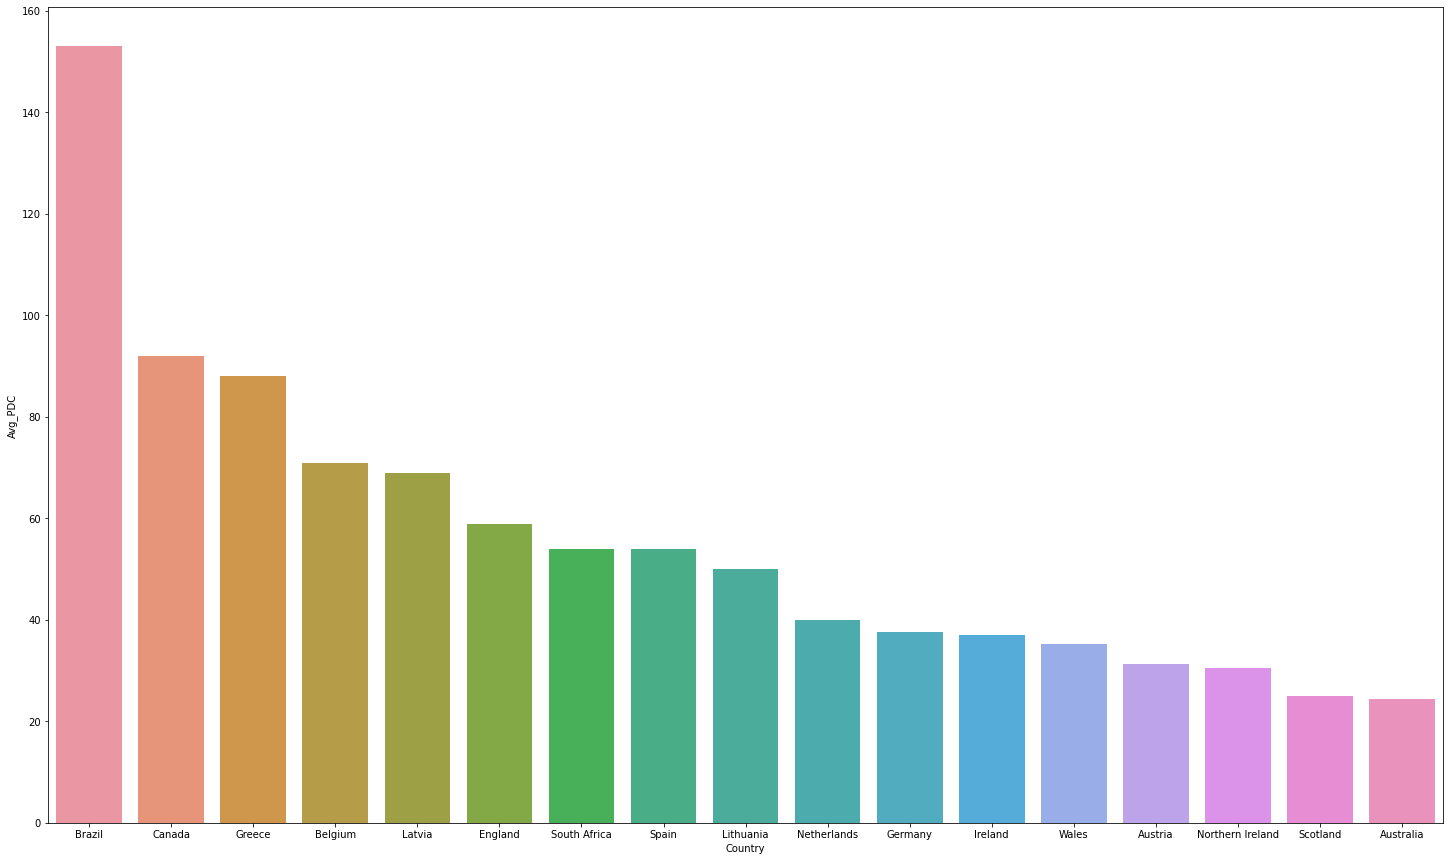

In [30]:
plt.figure(figsize=(25, 15))
ax =sns.barplot(x=DESC_PDC['Country'], y=DESC_PDC['Avg_PDC'])

In [25]:
DESC_players 

,Country,Total_players,Avg_PDC,CareerEarnings
0,England,43,58.837209,28317701
1,Netherlands,14,39.857143,31069400
2,Scotland,8,25.000000,18228950
3,Wales,5,35.200000,4157701
4,Belgium,5,70.800000,3267714
5,Northern Ireland,4,30.500000,3269201
6,Austria,3,31.333333,3065295
7,Australia,3,24.333333,4812174
8,Germany,2,37.500000,619111
9,Spain,2,54.000000,525187


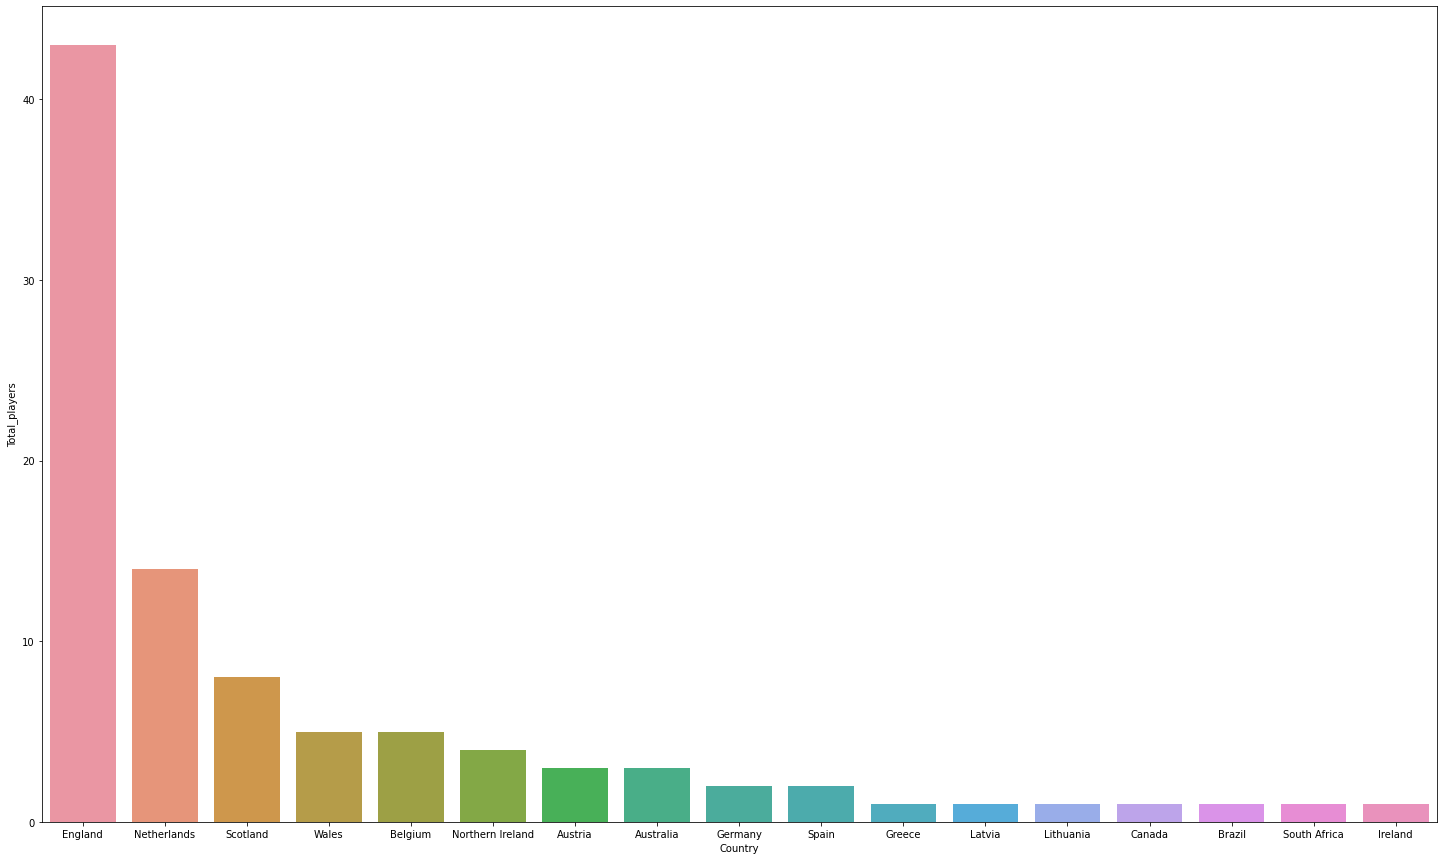

In [32]:
plt.figure(figsize=(25, 15))
ax =sns.barplot(x=DESC_players['Country'], y=DESC_players['Total_players'])

In [26]:
DESC_earnings

,Country,Total_players,Avg_PDC,CareerEarnings
0,Netherlands,14,39.857143,31069400
1,England,43,58.837209,28317701
2,Scotland,8,25.000000,18228950
3,Australia,3,24.333333,4812174
4,Wales,5,35.200000,4157701
5,Northern Ireland,4,30.500000,3269201
6,Belgium,5,70.800000,3267714
7,Austria,3,31.333333,3065295
8,Germany,2,37.500000,619111
9,Spain,2,54.000000,525187


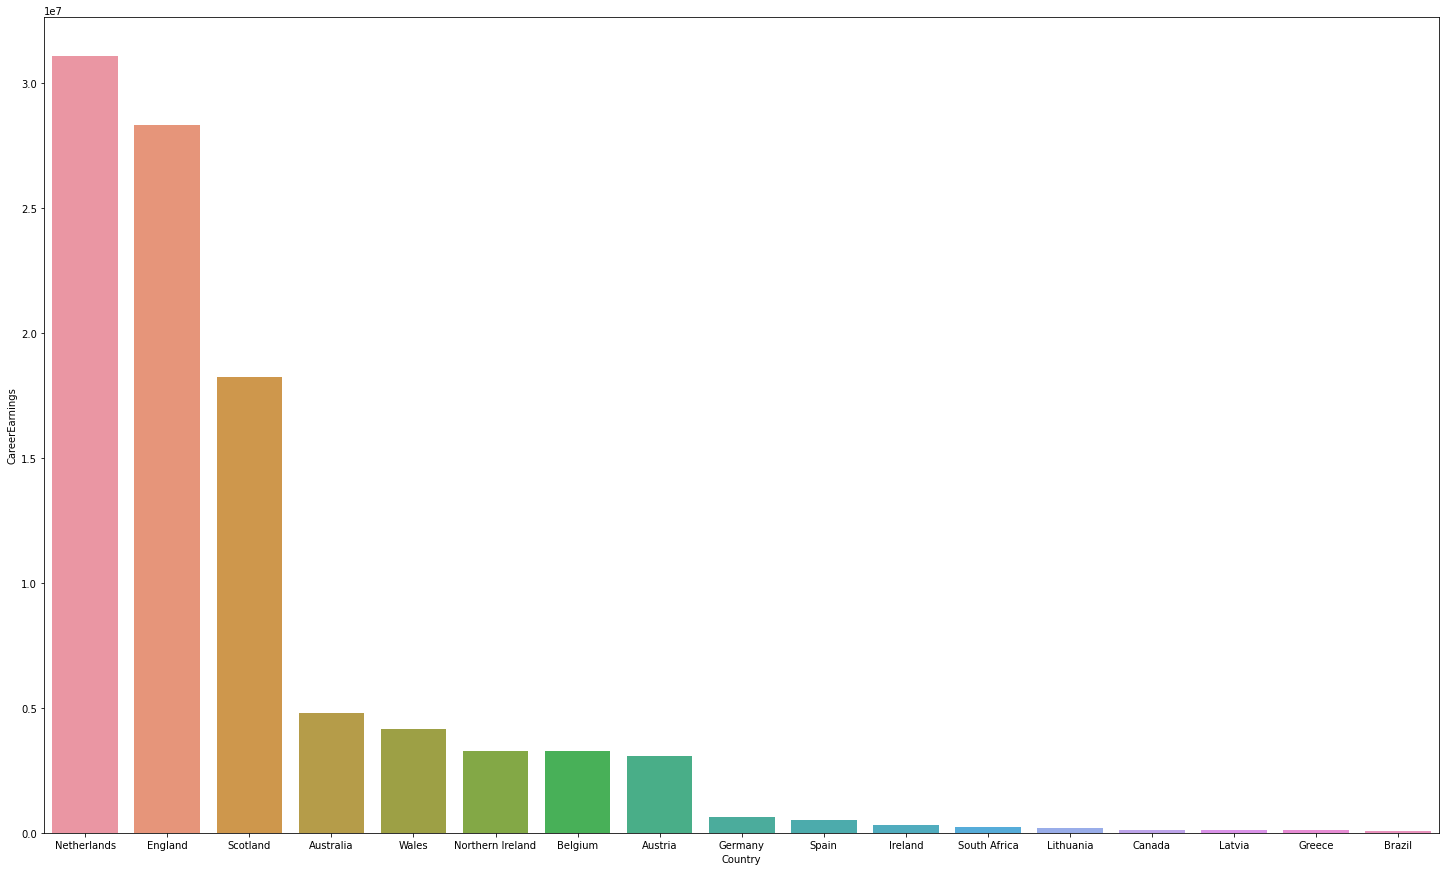

In [33]:
plt.figure(figsize=(25, 15))
ax =sns.barplot(x=DESC_earnings['Country'], y=DESC_earnings['CareerEarnings'])

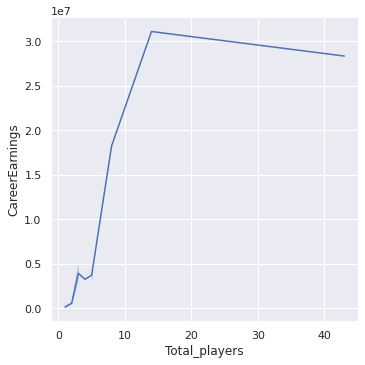

In [44]:
sns.set_theme(style="darkgrid")
ax = sns.relplot(x=DESC_earnings["Total_players"], y=DESC_earnings["CareerEarnings"], kind="line")

In [47]:
age_grouped = playerprofiles.groupby('Age', as_index=False).agg({'Name':'count',
                                                                 'CareerEarnings':'sum'})

In [48]:
age_grouped = age_grouped.rename(columns={'Name':'Total_players'})

In [49]:
age_grouped.head(1)

,Age,Total_players,CareerEarnings
0,24,2,619111


In [50]:
DESC_Age = age_grouped.sort_values('Age', ascending=True, inplace=False, ignore_index=True)

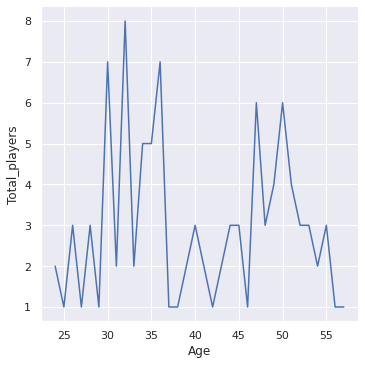

In [56]:
sns.set_theme(style="darkgrid")
sns.relplot(x=age_grouped["Age"], y=age_grouped["Total_players"], data=DESC_Age, kind='line')

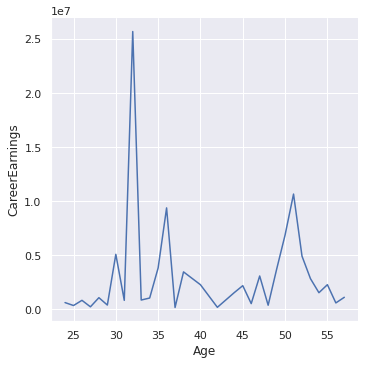

In [57]:
sns.set_theme(style="darkgrid")
sns.relplot(x=age_grouped["Age"], y=age_grouped["CareerEarnings"], data=DESC_Age, kind='line')